<a href="https://colab.research.google.com/github/Zeaxanthin80/CAI2300C/blob/main/Assignments/Assignment%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

>## Sentiment Analysis

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# %matplotlib inline

In [76]:
# Dataset with 120 entries (40 per category)
# This dataset include statements related to glucose levels
data = [
    # Low glucose level statements
    ("I'm feeling really dizzy and weak. I think my sugar is too low.", "low"),
    ("I have a slight headache, and I feel lightheaded.", "low"),
    ("I feel really shaky and sweaty.", "low"),
    ("I think I need some candy; I feel like passing out.", "low"),
    ("I'm sweating a lot and feel weak.", "low"),
    ("My hands are trembling, and I feel exhausted.", "low"),
    ("I feel disoriented and need to sit down.", "low"),
    ("I feel extremely tired and have blurry vision.", "low"),
    ("My sugar levels dropped, and I feel awful.", "low"),
    ("I feel faint and confused, I need some sugar.", "low"),
    ("I'm having trouble focusing, and I feel weak.", "low"),
    ("I'm suddenly very hungry and dizzy.", "low"),
    ("I feel shaky and nauseous.", "low"),
    ("I have a cold sweat and my legs feel wobbly.", "low"),
    ("I'm struggling to stay awake and feel sluggish.", "low"),
    ("I feel lightheaded and need to lie down.", "low"),
    ("I'm losing focus and feel jittery.", "low"),
    ("I feel cold and shivery but I'm sweating.", "low"),
    ("I feel completely drained of energy.", "low"),
    ("I'm experiencing intense hunger and dizziness.", "low"),
    ("I'm feeling weak and my heart is racing.", "low"),
    ("I can't seem to concentrate and feel exhausted.", "low"),
    ("I feel shaky and need to eat something immediately.", "low"),
    ("I have a pounding headache and feel lightheaded.", "low"),
    ("I feel like I might pass out any moment.", "low"),
    ("I'm sweating excessively and feel tired.", "low"),
    ("I feel wobbly and slightly disoriented.", "low"),
    ("My vision is slightly blurry, and I feel weak.", "low"),
    ("I feel nervous and shaky for no reason.", "low"),
    ("I have a cold sweat and my body feels weak.", "low"),
    ("My body feels exhausted and I'm shaking.", "low"),
    ("I'm experiencing sudden fatigue and dizziness.", "low"),
    ("I feel completely drained and lightheaded.", "low"),
    ("I'm so hungry and my hands are trembling.", "low"),
    ("I feel like my blood sugar is crashing.", "low"),
    ("I can't seem to think straight and feel weak.", "low"),
    ("I'm breaking out in a cold sweat and feel dizzy.", "low"),
    ("I feel like I need sugar immediately.", "low"),
    ("My whole body feels weak and fatigued.", "low"),
    ("I feel a little jittery and slightly confused.", "low"),

    # Normal glucose level statements
    ("I feel normal and my energy is steady.", "normal"),
    ("I feel good, no issues today.", "normal"),
    ("My body feels just right, no dizziness.", "normal"),
    ("No fatigue, no shaking, just normal.", "normal"),
    ("I have steady energy levels.", "normal"),
    ("No discomfort, I feel balanced.", "normal"),
    ("I don’t feel any abnormal symptoms.", "normal"),
    ("I feel well-rested and stable.", "normal"),
    ("No headaches or shakiness, everything’s fine.", "normal"),
    ("I feel refreshed and clear-minded.", "normal"),
    ("My sugar levels are stable today.", "normal"),
    ("I have normal energy, no sudden crashes.", "normal"),
    ("I feel alert and comfortable.", "normal"),
    ("I have no concerns about my glucose today.", "normal"),
    ("My energy remains consistent.", "normal"),
    ("I feel good and my focus is sharp.", "normal"),
    ("No dizziness, no exhaustion, all normal.", "normal"),
    ("I feel great overall, no signs of low or high sugar.", "normal"),
    ("I'm hydrated and feeling fine.", "normal"),
    ("No sudden hunger or fatigue, everything is fine.", "normal"),
    ("I feel perfectly balanced today.", "normal"),
    ("Everything feels stable, no changes.", "normal"),
    ("I'm feeling energized and stable.", "normal"),
    ("No extreme thirst or drowsiness, just normal.", "normal"),
    ("I feel neither too hungry nor too full, just right.", "normal"),
    ("I have no sudden mood swings, feeling good.", "normal"),
    ("No signs of sugar fluctuations today.", "normal"),
    ("My concentration is sharp and clear.", "normal"),
    ("I feel completely normal and at ease.", "normal"),
    ("No weakness or jitters, everything feels fine.", "normal"),
    ("My vision is clear, and I feel steady.", "normal"),
    ("No brain fog or sluggishness today.", "normal"),
    ("I woke up feeling refreshed and strong.", "normal"),
    ("No discomfort after meals, just balanced.", "normal"),
    ("I feel stable, no highs or lows.", "normal"),
    ("Everything feels fine, no symptoms at all.", "normal"),
    ("I'm maintaining a steady and normal state.", "normal"),
    ("I feel well, with no sugar-related issues.", "normal"),
    ("No dehydration or fatigue, everything is normal.", "normal"),
    ("I'm relaxed and feel completely fine.", "normal"),

    # High glucose level statements
    ("I'm feeling extremely thirsty and keep drinking water.", "high"),
    ("I have blurry vision and my mouth feels dry.", "high"),
    ("My sugar levels are way too high today.", "high"),
    ("I'm urinating frequently and feeling fatigued.", "high"),
    ("I'm feeling sluggish and tired all day.", "high"),
    ("I have a dry mouth and constant thirst.", "high"),
    ("I'm sweating a lot and feeling overheated.", "high"),
    ("I feel nauseous and drowsy.", "high"),
    ("My head feels heavy and I can't focus.", "high"),
    ("I feel overly exhausted despite resting.", "high"),
    ("I have an unquenchable thirst and keep drinking.", "high"),
    ("My vision is getting blurry and I feel weak.", "high"),
    ("I feel like I need to sleep all the time.", "high"),
    ("I keep sweating and feel unwell.", "high"),
    ("I'm constantly tired and unable to focus.", "high"),
    ("I feel really sluggish and unmotivated.", "high"),
    ("My blood sugar levels feel out of control.", "high"),
    ("I'm drinking water non-stop but still thirsty.", "high"),
    ("I feel very drained and keep yawning.", "high"),
    ("My energy is completely gone and I feel weak.", "high"),
    ("I feel dizzy and my sugar levels are high.", "high"),
    ("I keep feeling tired even after sleeping well.", "high"),
    ("I feel extremely hot and uncomfortable.", "high"),
    ("I'm drinking so much water but my mouth stays dry.", "high"),
    ("My sugar is too high, I feel out of it.", "high"),
    ("I'm experiencing extreme fatigue and dehydration.", "high"),
    ("I keep craving sugary foods but feel awful.", "high"),
    ("My muscles feel weak and I have no energy.", "high"),
    ("I feel bloated and my thirst won't go away.", "high"),
    ("I feel sluggish and have a dull headache.", "high"),
    ("My concentration is off, and I feel exhausted.", "high"),
    ("I feel hot and uncomfortable no matter what.", "high"),
    ("I feel groggy and slow in everything I do.", "high"),
    ("My mouth feels dry, and I can't seem to hydrate.", "high"),
    ("I keep waking up thirsty at night.", "high"),
    ("I feel like my sugar is way too high, I can't think straight.", "high"),
    ("My energy is completely drained, and I feel weak.", "high"),
    ("I feel heavy and slow, like I’m moving through syrup.", "high"),
    ("I have this constant dry feeling in my throat.", "high"),
    ("I'm feeling really fatigued and out of sorts.", "high"),

]

# Create DataFrame
df = pd.DataFrame(data, columns=["Patient Statement", "Glucose Level Category"])

# Save as CSV
df.to_csv("glucose_levels_dataset.csv", index=False)

# Display DataFrame
df.head()

,Patient Statement,Glucose Level Category
0,I'm feeling really dizzy and weak. I think my ...,low
1,"I have a slight headache, and I feel lightheaded.",low
2,I feel really shaky and sweaty.,low
3,I think I need some candy; I feel like passing...,low
4,I'm sweating a lot and feel weak.,low


In [77]:
# df: This is your Pandas DataFrame, which is like a table holding your data.
df = pd.read_csv("https://github.com/Zeaxanthin80/CAI2300C/raw/refs/heads/main/datasets/glucose_levels_dataset.csv",
                 names=['Patient Statement', 'Glucose Level Category'])
# The head() function is used to display the first few rows of the DataFrame.
# By default, it shows the top 5 rows.
df.head()


# for classification in an AI Model for NLP - it requires a label and a text column
# if your dataset has multiple columns - then drop the columns that are not text based

,Patient Statement,Glucose Level Category
0,I feel really shaky and sweaty.,low
1,I'm feeling really dizzy and weak.,low
2,I think I need some candy; I feel like passing...,low
3,I think I need some candy; I feel like passing...,low
4,I'm feeling really dizzy and weak.,low


In [78]:
# len(): This is a built-in Python function that returns the length of an object.
# When used with a DataFrame, it returns the number of rows.
len(df)

3000

In [79]:
# This specific line of code is used to check for missing values in the dataset.
# isnull(): This function checks each cell in the DataFrame.
# If a cell is empty or contains a special value like NaN (Not a Number), it's marked as True, otherwise False.
# sum(): This function then adds up all the True values for each column.
# The result shows how many missing values are present in each column of your DataFrame.
df.isnull().sum()

,0
Patient Statement,0
Glucose Level Category,0


In [80]:
# df['message']: This part selects the entire 'message' column from the DataFrame.
# It isolates all the text messages in the dataset.
# .unique(): This is a Pandas function.
# When applied to a column (like df['message']), it finds and returns all the unique (distinct) values present in that column.
unique_messages = df['Patient Statement'].unique()

# This for loop is to print only the first 10 unique values.
# enumerate() is used to get both the index (i) and the value (message) of each element in the unique_messages array.
for i, message in enumerate(unique_messages):
    if i < 10:  # Print only if the index is less than 10
        print(f"{i + 1}. {message}")
    else:
        break  # Stop the loop after printing 10 messages

1. I feel really shaky and sweaty.
2. I'm feeling really dizzy and weak.
3. I think I need some candy; I feel like passing out.
4. I have a slight headache and feel lightheaded.
5. I'm sweating a lot and feel weak.My hands are trembling, and I feel exhausted.I feel disoriented and need to sit down.I feel extremely tired and have blurry vision.I'm having trouble focusing, and I feel weak.I'm suddenly very hungry and dizzy.I feel lightheaded and need to lie down.I can't seem to concentrate and feel exhausted.I feel like my blood sugar is crashing.I can't seem to think straight and feel weak.I'm breaking out in a cold sweat and feel dizzy.
6. I feel normal and my energy is steady.
7. I feel good, no issues today.
8. I have steady energy levels.Everything feels stable, no changes.I'm feeling energized and stable.,normalNo extreme thirst or drowsiness, just normal.I feel neither too hungry nor too full, just right.I have no sudden mood swings, feeling good.No signs of sugar fluctuations tod

In [81]:
# .value_counts(): This is a function that is applied to the selected 'message' column.
# It looks at all the unique values (distinct messages) in the column.
# It then counts how many times each unique value appears in the column.
# Finally, it returns a new data structure (a Pandas Series).
# In simpler terms: This line of code tells you how many times each distinct message appears in your dataset.
df['Patient Statement'].value_counts()

,count
Patient Statement,
I'm urinating frequently and feeling fatigued.,229
"No fatigue, no shaking, just normal.",209
"I'm sweating a lot and feel weak.My hands are trembling, and I feel exhausted.I feel disoriented and need to sit down.I feel extremely tired and have blurry vision.I'm having trouble focusing, and I feel weak.I'm suddenly very hungry and dizzy.I feel lightheaded and need to lie down.I can't seem to concentrate and feel exhausted.I feel like my blood sugar is crashing.I can't seem to think straight and feel weak.I'm breaking out in a cold sweat and feel dizzy.",208
I think I need some candy; I feel like passing out.,203
I feel normal and my energy is steady.,203
I'm feeling really dizzy and weak.,201
I have blurry vision and my mouth feels dry.,198
I'm feeling sluggish and tired all day.I have a dry mouth and constant thirst.I'm sweating a lot and feeling overheated.I feel nauseous and drowsy.My head feels heavy and I can't focus.I feel overly exhausted despite resting.I have an unquenchable thirst and keep drinking.My vision is getting blurry and I feel weak.I feel like I need to sleep all the time.I keep sweating and feel unwell.I'm constantly tired and unable to focus.,198
I feel really shaky and sweaty.,196


In [82]:
# This is the minimum. You can obviously clean the data more than this if you choose.
# I would consider using Lemma's... but it is your choice

import re # re: This library is used for regular expressions, which are helpful for pattern matching in text.
import nltk # nltk: The Natural Language Toolkit (NLTK) is a powerful library for working with human language data.

# nltk.download(): This function is used to download NLTK data, including corpora, models, and other resources.
#'stopwords': This argument specifies that we want to download the "stopwords" dataset, which contains lists of stop words for different languages.
# Once downloaded, you can access and use the stop words lists through the nltk.corpus.stopwords module.
nltk.download('stopwords')

from nltk.corpus import stopwords # This module from NLTK provides a list of common words (like "the," "a," "is") that are often removed from text data as they don't usually carry much meaning.
from nltk.stem.porter import PorterStemmer # This is a tool from NLTK used for stemming, which reduces words to their root form (e.g., "running" becomes "run").

ps = PorterStemmer() # Creates an instance of the PorterStemmer for use later.
corpus = [] # An empty list called corpus is created to store the cleaned text data.

# The code then enters a loop that iterates through each message in the 'message' column of the DataFrame df.
for i in range(0, len(df)):
    # This line uses a regular expression to remove any characters that are not letters (a-z, A-Z) and replaces them with spaces.
    # This helps clean up punctuation and special characters.
    review = re.sub('[^a-zA-Z]', ' ', df['Patient Statement'][i])

    review = review.lower() # Converts the entire message to lowercase
    review = review.split() # Splits the message into a list of individual words.

    # This is a list comprehension that does two things:
    # It uses the PorterStemmer (ps) to reduce each word to its root form (stemming).
    # It also checks if the word is in the list of English stop words and removes it if it is.
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review) # Joins the stemmed and filtered words back into a single string.
    corpus.append(review) # Adds the cleaned and processed message (now in the review variable) to the corpus list.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
# This line of code is used to display the first 5 elements of the corpus list.
corpus[:5]

['feel realli shaki sweati',
 'feel realli dizzi weak',
 'think need candi feel like pass',
 'think need candi feel like pass',
 'feel realli dizzi weak']

In [84]:
# This line creates a new variable called X and assigns it the values from the 'message' column of the DataFrame (df).
X = df['Patient Statement']
# This line creates a variable y and assigns it the values from the 'label' column of the DataFrame (df).
y = df['Glucose Level Category']

# Features (X): The text data that the model will learn from.
# Target (y): The labels or categories that I want the model to predic

# train_test_split: This is a function from the sklearn.model_selection module.
# It's a very common practice in machine learning to split your data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
# X, y: These are the feature and target data defined earlier.
# test_size = 0.30: This means 30% of the data will be used for testing, and the remaining 70% for training.
# random_state = 42: This ensures that the split is reproducible. If you run this code again with the same random_state, you'll get the same split.

'''
Output Variables:

  ● X_train: The training data (features).
  ● X_test: The testing data (features).
  ● y_train: The training data (labels).
  ● y_test: The testing data (labels).
'''

X_train.shape # This line simply prints the dimensions of the X_train dataset.

(2100,)

In [85]:
# CountVectorizer: Converts the text in a matrix of token counts... creates the Bag of Words (BoW) - the count of each word
# TfidfTransformer: Coverting those counts (from the BoW) - into a score for each word.  So each word is represented by a number.

'''
This part is all about preparing the text data for the machine learning model.
Machine learning models work with numbers, not raw text.
So, we need to convert the text messages into a numerical format that the model can understand.
This process is often called feature extraction or vectorization.
'''
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_counts =count_vect.fit_transform(X_train)

print("Shape of count vectorizer", X_train_counts.shape)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf =tfidf_transformer.fit_transform(X_train_counts)

print("Shape of tfidf feature extraction",X_train_tfidf.shape)

Shape of count vectorizer (2100, 129)
Shape of tfidf feature extraction (2100, 129)


In [86]:
from sklearn.linear_model import LogisticRegression
# clf variable is used instead of the whole word classifier

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [88]:
predictions = text_clf.predict(X_test)

In [89]:
from sklearn import metrics
print(" Confusion Metrics\n","―"*17,"\n",metrics.confusion_matrix(y_test,predictions), end="\n\n\n")

print(" Classification Report\n","―"*21,"\n", metrics.classification_report(y_test,predictions), end="\n\n\n")

print(" Accuracy Score:", metrics.accuracy_score(y_test,predictions))

 Confusion Metrics
 ――――――――――――――――― 
 [[296   0   0]
 [  0 313   0]
 [  0   0 291]]


 Classification Report
 ――――――――――――――――――――― 
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       296
         low       1.00      1.00      1.00       313
      normal       1.00      1.00      1.00       291

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



 Accuracy Score: 1.0


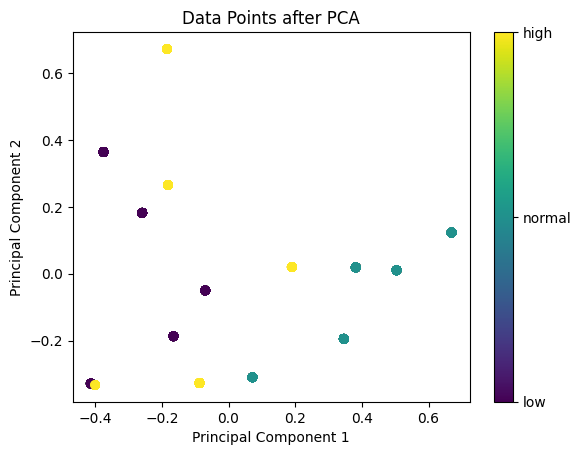

In [90]:
from sklearn.decomposition import PCA



# Assuming X_train_tfidf is your feature data
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())

# Convert string labels to numerical values for color mapping
label_mapping = {'low': 0, 'normal': 1, 'high': 2}
y_train_numeric = y_train.map(label_mapping) # Apply the mapping to y_train

# Plot the data points with numerical color values
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_numeric, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points after PCA')

# Add a colorbar to show the label-color mapping
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2])  # Set tick positions for the colorbar
cbar.set_ticklabels(['low', 'normal', 'high'])  # Set tick labels

plt.show()

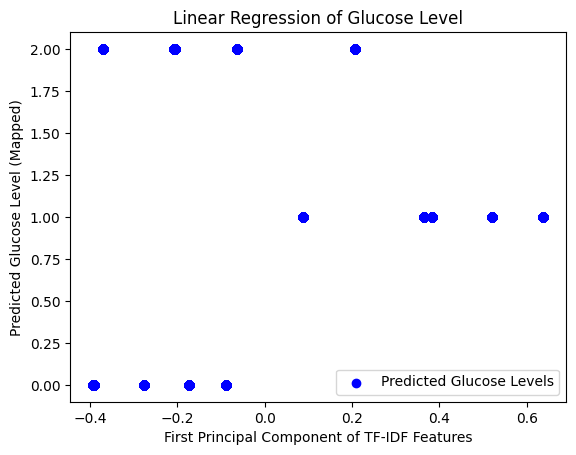

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# ... (your data loading and preprocessing code) ...

# 1. Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Patient Statement'], df['Glucose Level Category'], test_size=0.2, random_state=42
)

# 3. Fit and transform the data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Map 'Glucose Level Category' to numerical values
level_mapping = {'low': 0, 'normal': 1, 'high': 2}
y_train_numeric = y_train.map(level_mapping)
y_test_numeric = y_test.map(level_mapping)

# 5. Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_vec, y_train_numeric)

# 6. Predict glucose levels
X_vec = vectorizer.transform(df['Patient Statement'])  # Vectorize all 'Patient Statement' data
y_pred = model.predict(X_vec)

# 7. Visualize:
# a. Choose a numerical feature for the x-axis.
#    Here, we'll use the first principal component from PCA on the TF-IDF features.
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_vec.toarray())

# b. Plot the predicted glucose levels against the chosen feature
plt.scatter(X_pca, y_pred, color='blue', label='Predicted Glucose Levels')
plt.xlabel('First Principal Component of TF-IDF Features')
plt.ylabel('Predicted Glucose Level (Mapped)')
plt.title('Linear Regression of Glucose Level')
plt.legend()
plt.show()

In [92]:
def predict_text(model, text):
    """
    Predict the class of the given text using the trained model.

    :param model: The trained text classification model (pipeline).
    :param text: A string containing the text to be classified.
    :return: The predicted class of the text.
    """
    prediction = model.predict([text])
    return prediction[0]

# Example usage
your_text = "It's a pretty normal day."
prediction = predict_text(text_clf, your_text)
print("Predicted class:", prediction)

Predicted class: normal


In [93]:
def predict_text_with_score(model, text):
    """
    Predict the class of the given text using the trained model and provide the probability scores.

    :param model: The trained text classification model (pipeline).
    :param text: A string containing the text to be classified.
    :return: The predicted class of the text and the probability scores.
    """
    prediction = model.predict([text])
    prediction_proba = model.predict_proba([text])

    # Getting the class labels
    class_labels = model.classes_

    # Formatting the probability scores along with the class labels
    proba_scores = {class_labels[i]: prediction_proba[0][i] for i in range(len(class_labels))}

    return prediction[0], proba_scores

# Example usage
your_text = "I feel horrible"
predicted_class, scores = predict_text_with_score(text_clf, your_text)
print("Predicted class:", predicted_class)
print("Probability Scores:", scores)

Predicted class: low
Probability Scores: {'high': 0.032091538876427204, 'low': 0.8000610992937554, 'normal': 0.1678473618298174}


In [94]:
import joblib

# Save your model
joblib.dump(text_clf, 'text_clf_model.joblib')

['text_clf_model.joblib']

In [95]:
from sklearn.svm import SVC
lr_model = SVC(gamma='auto')


SVC_text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC(gamma='auto')),])
SVC_text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(gamma='auto'))])

In [96]:
SVC_predictions = SVC_text_clf.predict(X_test)

In [97]:
from sklearn import metrics
print(" Confusion Metrics\n","―"*17,"\n",metrics.confusion_matrix(y_test,SVC_predictions), end="\n\n\n")

print(" Classification Report\n","―"*21,"\n", metrics.classification_report(y_test,SVC_predictions), end="\n\n\n")

print(" Accuracy Score:", metrics.accuracy_score(y_test,SVC_predictions))

 Confusion Metrics
 ――――――――――――――――― 
 [[186   0   0]
 [  0 217   0]
 [  0   0 197]]


 Classification Report
 ――――――――――――――――――――― 
               precision    recall  f1-score   support

        high       1.00      1.00      1.00       186
         low       1.00      1.00      1.00       217
      normal       1.00      1.00      1.00       197

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



 Accuracy Score: 1.0


In [98]:
y_train.value_counts()

,count
Glucose Level Category,
high,814
normal,803
low,783


In [99]:
y_test.value_counts()

,count
Glucose Level Category,
low,217
normal,197
high,186
